# Unsupervised Binning
Unsupervised binning methods transform numerical variables into categorical counterparts but do not use the target (class) information. Equal Width and Equal Frequency are two unsupervised binning methods.

In [1]:
#Importin libraries that we´ll use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Size of the plots
plt.rcParams['figure.figsize'] = [20,10]

In [3]:
#Create a DataFrame that we'll use
Data = {
    "City": ["MX", "EUA", "MX", "CA", "CA", "MX", "CA", "EUA", "CA", "EUA", "MX", "EUA", "MX", "MX", "CA", "EUA", "EUA", "CA", "EUA", "MX", "CA", "MX", "EUA", "EUA","MX"],
    "Rank": ["1st","2st","3st","1st","3st","2st","2st","3st","3st","1st","2st",  "3st","3st","2st","1st","2st","3st","1st","2st","3st", "3st", "3st", "2st", "1st", "2st"],
    "Playing_time_years": [1,11,6,10,3,11,5,7,3,9,12,2,12,1,5,9,6,1,11,4,9,7,2,8,10],
    "Score1": [89,74,31,93,21,68,76,12,32,97,78,33,30,70,98,73,21,95,80,54,30,34,87,99,85],
    "Score2": [85,71,50,93,29,65,79,20,20,85,78,31,33,74,95,70,26,99,83,51,33,40,85,98,83],
}
#To DataFrame
df = pd.DataFrame(Data,
                 columns = pd.Index(["City","Rank", "Playing_time_years","Score1","Score2"]))

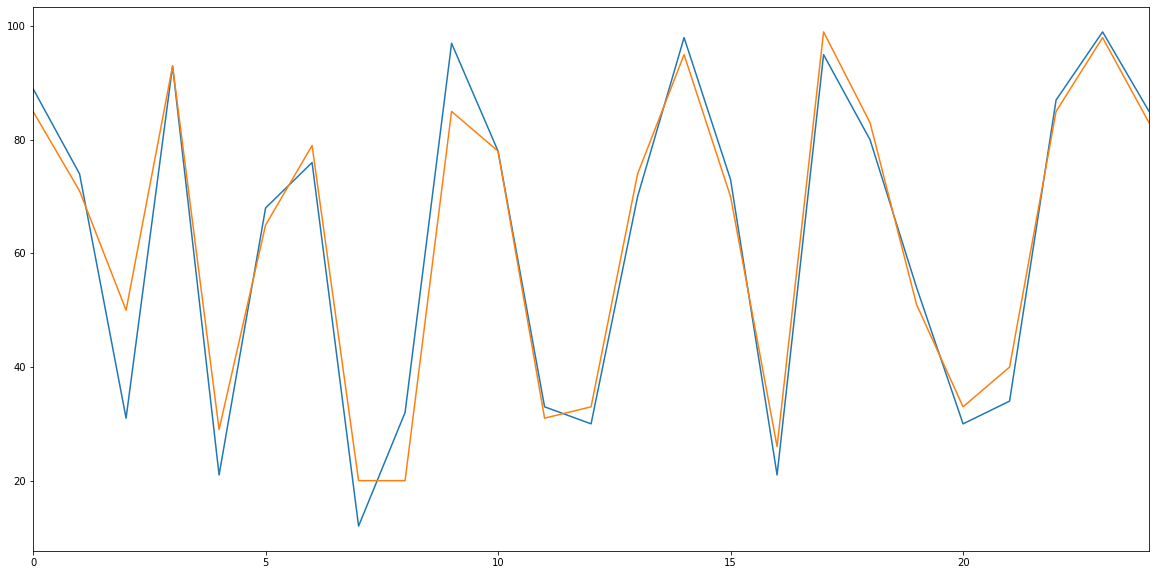

In [4]:
dfp = df.Score1.plot(),df.Score2.plot()

In [5]:
#Create a new column to categorize
df["Final_Score"]= df[['Score1','Score2']].mean(axis=1) 

In [6]:
df.head()

,City,Rank,Playing_time_years,Score1,Score2,Final_Score
0,MX,1st,1,89,85,87.0
1,EUA,2st,11,74,71,72.5
2,MX,3st,6,31,50,40.5
3,CA,1st,10,93,93,93.0
4,CA,3st,3,21,29,25.0


In [7]:
#A way to categorize is create the ranks
bins = [0, 70, 80, 90, 100]

In [8]:
#Ranks
groups = ["Low", "Average", "outstanding", "Brilliant"]

In [9]:
#Applying to categorize(creating a new column)
df['grade'] = pd.cut(df.Final_Score, bins, labels = groups)

In [10]:
df

,City,Rank,Playing_time_years,Score1,Score2,Final_Score,grade
0,MX,1st,1,89,85,87.0,outstanding
1,EUA,2st,11,74,71,72.5,Average
2,MX,3st,6,31,50,40.5,Low
3,CA,1st,10,93,93,93.0,Brilliant
4,CA,3st,3,21,29,25.0,Low
5,MX,2st,11,68,65,66.5,Low
6,CA,2st,5,76,79,77.5,Average
7,EUA,3st,7,12,20,16.0,Low
8,CA,3st,3,32,20,26.0,Low
9,EUA,1st,9,97,85,91.0,Brilliant


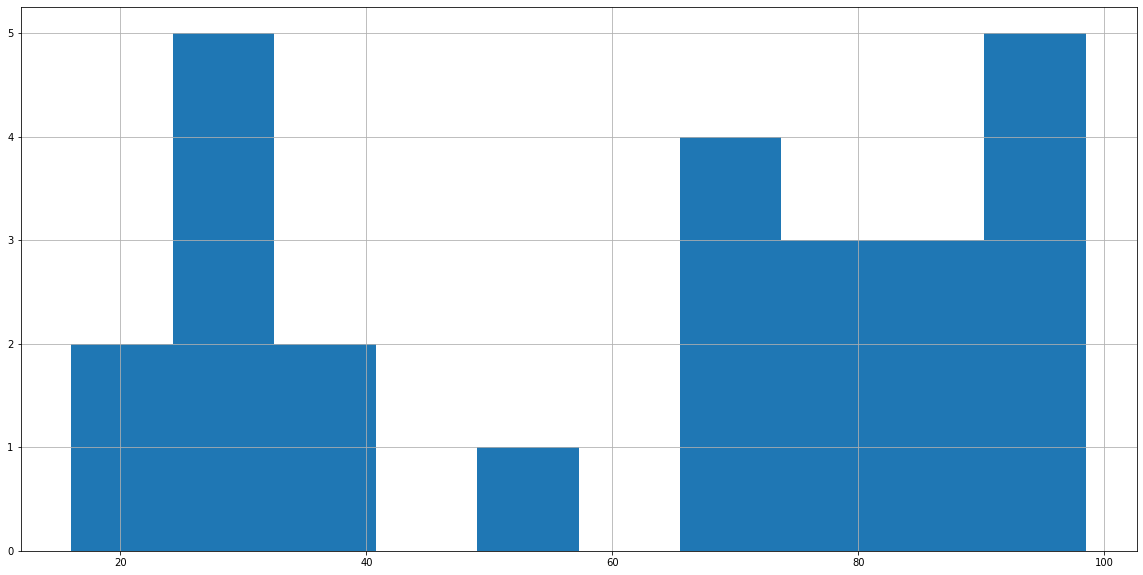

In [11]:
df.Final_Score.hist()

In [12]:
# Plot Function 
def bar_plot(dataframe, column):
    sns.countplot(x = column, data = dataframe)
    plt.xticks(rotation = 90)
    plt.show()

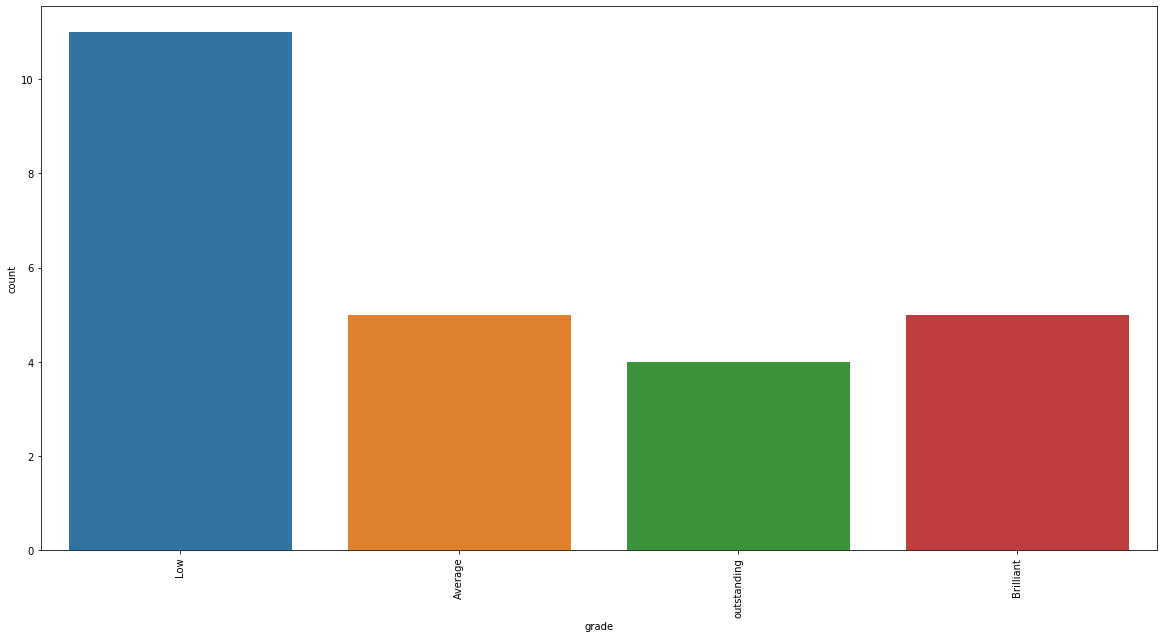

In [13]:
bar_plot(df, df.grade)

# Equal Frecuency

In [14]:
bins2 = [0, 2, 5, 8, 10, 12]

In [15]:
groups2 = ["<=2", "3-5", "6-8", "9-10", "11-12"]

In [16]:
df['Level'] = pd.cut(df.Playing_time_years, bins2, labels = groups2)

In [17]:
df.head()

,City,Rank,Playing_time_years,Score1,Score2,Final_Score,grade,Level
0,MX,1st,1,89,85,87.0,outstanding,<=2
1,EUA,2st,11,74,71,72.5,Average,11-12
2,MX,3st,6,31,50,40.5,Low,5-8
3,CA,1st,10,93,93,93.0,Brilliant,9-10
4,CA,3st,3,21,29,25.0,Low,3-5


In [18]:
# Plot Function 
def bar_plot(dataframe, column):
    sns.countplot(x = column, data = dataframe)
    plt.xticks(rotation = 90)
    plt.show()

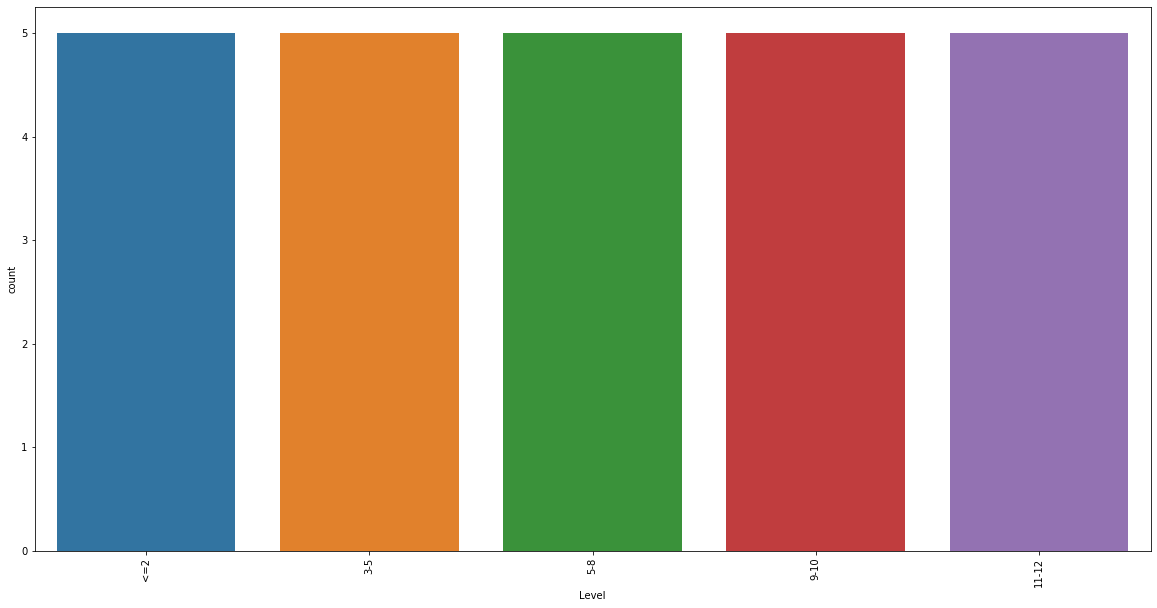

In [19]:
bar_plot(df, df.Level)

# Equal Width

In [20]:
bins3 = [0, 3, 6, 9, 12]

In [21]:
groups3 = ['<=3','4-6','7-9','10-12']

In [22]:
df['Year_group'] = pd.cut(df.Playing_time_years, bins3, labels = groups3)

In [23]:
df.head()

,City,Rank,Playing_time_years,Score1,Score2,Final_Score,grade,Level,Year_group
0,MX,1st,1,89,85,87.0,outstanding,<=2,<=3
1,EUA,2st,11,74,71,72.5,Average,11-12,10-12
2,MX,3st,6,31,50,40.5,Low,5-8,4-6
3,CA,1st,10,93,93,93.0,Brilliant,9-10,10-12
4,CA,3st,3,21,29,25.0,Low,3-5,<=3


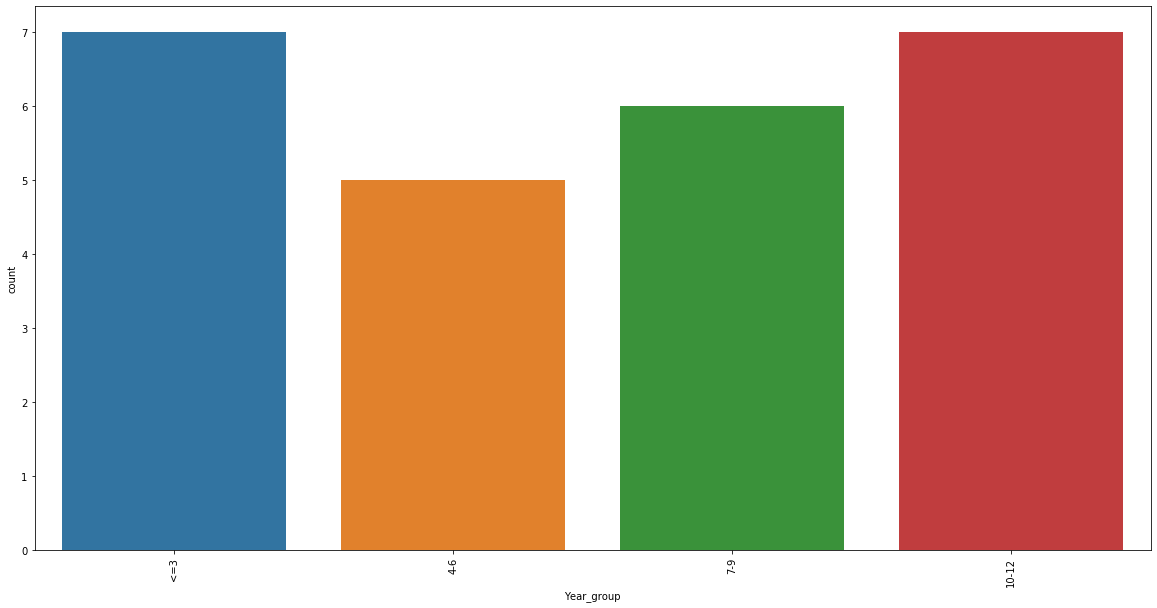

In [24]:
bar_plot(df, df.Year_group)